<center><h1>Assignment 3 - Support Vector Machines</h1></center>
<center><strong>Data 622: Big Data and Machine Learning</strong></center>
<center><em>Dirk Hartog</em></center>

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import package to create svm classifier
from sklearn.svm import SVC # this will make a support vector machine for classificaiton

# Feature engineering 
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Import packages for model tuning
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, KFold, cross_val_score

# import libraries for obtaining metrics
from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay


## Data Set: Parkinson's Disease

For this assignement we will be using the Parkinsons Disease Data set from assignment 1 & 2. The primary goal of project is to build and evluate the performance of a support vector machine classifier to predict the presence of Parkinson's Disease and compare it to the perfromace of the decision trees and random forest techniques used in assignment 2. 

The Parkinsons Disease Data set that can be found at <a href = "https://www.kaggle.com/datasets/rabieelkharoua/parkinsons-disease-dataset-analysis">Kaggle.com</a>. 

In [5]:
# Import Parkinson's Data 

data =  pd.read_csv("https://raw.githubusercontent.com/D-hartog/DATA622/refs/heads/main/assignment1/parkinsons_disease_data.csv")

parkinsons_df = data.copy()

### Data Key

**Patient Information**

- Patient ID
    - PatientID: A unique identifier assigned to each patient (3058 to 5162).
- Demographic Details
    - Age: The age of the patients ranges from 50 to 90 years.
    - Gender: Gender of the patients, where 0 represents Male and 1 represents Female.
    - Ethnicity: The ethnicity of the patients, coded as follows:
        - 0: Caucasian
        - 1: African American
        - 2: Asian
        - 3: Other
    - EducationLevel: The education level of the patients, coded as follows:
        - 0: None
        - 1: High School
        - 2: Bachelor's
        - 3: Higher
- Lifestyle Factors
    - BMI: Body Mass Index of the patients, ranging from 15 to 40.
    - Smoking: Smoking status, where 0 indicates No and 1 indicates Yes.        
    - AlcoholConsumption: Weekly alcohol consumption in units, ranging from 0 to 20.
    - PhysicalActivity: Weekly physical activity in hours, ranging from 0 to 10.
    - DietQuality: Diet quality score, ranging from 0 to 10.
    - SleepQuality: Sleep quality score, ranging from 4 to 10.
    
**Medical History**

- FamilyHistoryParkinsons: Family history of Parkinson's Disease, where 0 indicates No and 1 indicates Yes.
- TraumaticBrainInjury: History of traumatic brain injury, where 0 indicates No and 1 indicates Yes.
- Hypertension: Presence of hypertension, where 0 indicates No and 1 indicates Yes.
- Diabetes: Presence of diabetes, where 0 indicates No and 1 indicates Yes.
- Depression: Presence of depression, where 0 indicates No and 1 indicates Yes.
- Stroke: History of stroke, where 0 indicates No and 1 indicates Yes.
    
**Clinical Measurements**

- SystolicBP: Systolic blood pressure, ranging from 90 to 180 mmHg.
- DiastolicBP: Diastolic blood pressure, ranging from 60 to 120 mmHg.
- CholesterolTotal: Total cholesterol levels, ranging from 150 to 300 mg/dL.
- CholesterolLDL: Low-density lipoprotein cholesterol levels, ranging from 50 to 200 mg/dL.
- CholesterolHDL: High-density lipoprotein cholesterol levels, ranging from 20 to 100 mg/dL.
- CholesterolTriglycerides: Triglycerides levels, ranging from 50 to 400 mg/dL.
    
**Cognitive and Functional Assessments**

- UPDRS: Unified Parkinson's Disease Rating Scale score, ranging from 0 to 199. Higher scores indicate greater severity of the disease.
- MoCA: Montreal Cognitive Assessment score, ranging from 0 to 30. Lower scores indicate cognitive impairment.
- FunctionalAssessment: Functional assessment score, ranging from 0 to 10. Lower scores indicate greater impairment.
    
**Symptoms**

- Tremor: Presence of tremor, where 0 indicates No and 1 indicates Yes.
- Rigidity: Presence of muscle rigidity, where 0 indicates No and 1 indicates Yes.
- Bradykinesia: Presence of bradykinesia (slowness of movement), where 0 indicates No and 1 indicates Yes.
- PosturalInstability: Presence of postural instability, where 0 indicates No and 1 indicates Yes.
- SpeechProblems: Presence of speech problems, where 0 indicates No and 1 indicates Yes.
- SleepDisorders: Presence of sleep disorders, where 0 indicates No and 1 indicates Yes.
- Constipation: Presence of constipation, where 0 indicates No and 1 indicates Yes.
    
**Diagnosis Information**

- Diagnosis: Diagnosis status for Parkinson's Disease, where 0 indicates No and 1 indicates Yes.
    
**Confidential Information**

- DoctorInCharge: This column contains confidential information about the doctor in charge, with "DrXXXConfid" as the value for all patients.


### Brief Exploratory Data Analysis

In [9]:
parkinsons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

In [11]:
parkinsons_df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


In [13]:
# Drop the DoctorInCharge and PatientID as this feature does not add any predictive value

parkinsons_df.drop(columns= ["DoctorInCharge", "PatientID"], inplace = True)

In [15]:
# Convert necessary columns to categorical data types

cols_to_convert = ["Gender", "Ethnicity", "EducationLevel", "Smoking", "FamilyHistoryParkinsons",
                 "TraumaticBrainInjury", "Hypertension", "Diabetes", "Stroke", "Tremor", "Rigidity", 
                 "Bradykinesia", "PosturalInstability", "SpeechProblems", "SleepDisorders", "Constipation",
                 "Diagnosis", "Depression"]

for col in cols_to_convert: 
    parkinsons_df[col] = parkinsons_df[col].astype("object")

## Building Support Vector Machines

All of the support vector machines will be built with the radial basis function kernel. The rbf kernal computes the similarity between data points based on their Euclidean distance in a high-dimensional space. 

### MODEL 1: SVM with all features

- Default values for gamma and C will be used

**STEP 1:** Split the data into training and testing data sets

In [20]:
X = parkinsons_df.drop(["Diagnosis"], axis = 1)
X = pd.get_dummies(X, dtype = int)

y = parkinsons_df["Diagnosis"].astype("int64")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

/Applications/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


**STEP 2:** Center and scale the data as "rbf" assumes that the data follows a normal distribution

In [23]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**STEP 3:** Fit the model with training data and run predictions with the test data  

In [26]:
# Fit model with training data

clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

# Predict classes with test data
y_pred = clf_svm.predict(X_test_scaled)

**STEP 4:** Visualize confusion matrix and get evaluate model performance

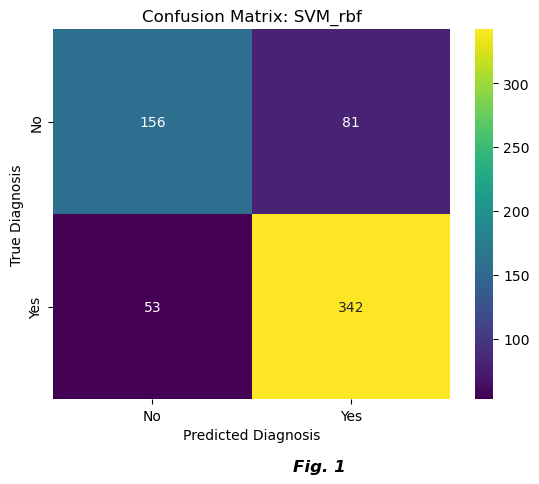

In [29]:
## Create a confusion Matrix 

# Confusion Matrix 

con_mat = confusion_matrix(y_true = y_test, 
                           y_pred = y_pred, labels = clf_svm.classes_)
sns.heatmap(con_mat, annot=True,
           xticklabels = ["No", "Yes"],
           yticklabels = ["No", "Yes"], 
           fmt="d", 
           cmap="viridis")

# Set labels so they are not in exponential form 
plt.ylabel("True Diagnosis")
plt.xlabel("Predicted Diagnosis")
plt.figtext(x = 0.5, y = -0.04, s = "Fig. 1", fontstyle = "italic", fontweight = "demibold", fontsize = 12)
plt.title("Confusion Matrix: SVM_rbf")
plt.show()

In [31]:
# Caluculate performance metrics

# F1 Score 

clf_svm_f1 = f1_score(y_test, y_pred)

# Sensitivity
clf_svm_sens = recall_score(y_test, y_pred)

# Precision
clf_svm_prec = precision_score(y_test, y_pred)

# Specificity
clf_svm_spec = con_mat[0,0]/(con_mat[0,0] + con_mat[0,1])

# Accuracy
clf_svm_acc = accuracy_score(y_test, y_pred)

# Area under the ROC curve
clf_svm_auc = roc_auc_score(y_test, y_pred)

clf_svm_metrics = pd.DataFrame({"Metric": ["F1_score","Sensitivty", "Specificity", "Precision", "Accuracy", "AUC"], 
                                "Values" : [clf_svm_f1, clf_svm_sens, clf_svm_spec, clf_svm_prec, clf_svm_acc, clf_svm_auc]})

clf_svm_metrics

,Metric,Values
0,F1_score,0.836186
1,Sensitivty,0.865823
2,Specificity,0.658228
3,Precision,0.808511
4,Accuracy,0.787975
5,AUC,0.762025


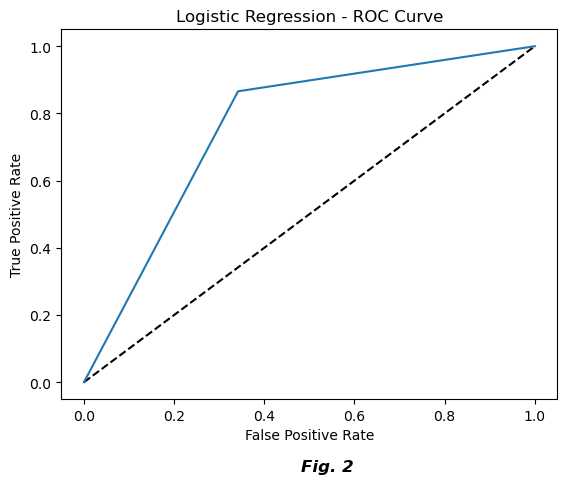

In [33]:
# ROC curve
fpr, tpr, thresholds, = roc_curve(y_test, y_pred)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression - ROC Curve')
plt.figtext(x = 0.5, y = -0.04, s = "Fig. 2", fontstyle = "italic", fontweight = "demibold", fontsize = 12)
plt.show()

In [35]:
print(roc_auc_score(y_test, y_pred))

0.7620253164556962


### MODEL 2: SVM with all features and cross validation

In [38]:
# Get default value for gamma
num_features = np.size(X_train_scaled, axis=1)

# Create the parameter grid
param_grid = [
  {'C': [1, 10, 100, 1000], 
   'gamma': [1/num_features, 1, 0.1, 0.01, 0.001, 0.0001], 
   'kernel': ['rbf', 'poly']},
]

optimal_params = GridSearchCV(
        SVC(), 
        param_grid,
        cv=5,
        scoring='roc_auc', 
        verbose=0
)

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


**REPEAT STEPS 3-4:** 

- 3. Fit model to the scaled trianing data and use testing data to get predictions 
- 4. Evaluate model performance

In [41]:
# Build the model
clf_svm_best = SVC(C = 10, gamma = 0.001, kernel = 'rbf', random_state=42)
clf_svm_best.fit(X_train_scaled, y_train)

# Predict outcome using test set
y_pred = clf_svm_best.predict(X_test_scaled)

In [43]:
# Build a confusion matrix
con_mat = confusion_matrix(y_true = y_test, 
                           y_pred = y_pred, labels = clf_svm_best.classes_)

In [45]:

# Caluculate performance metrix
# F1 Score 

clf_svm_best_f1 = f1_score(y_test, y_pred)

# Sensitivity
clf_svm_best_sens = recall_score(y_test, y_pred)

# Precision
clf_svm_best_prec = precision_score(y_test, y_pred)

# Specificity
clf_svm_best_spec = con_mat[0,0]/(con_mat[0,0] + con_mat[0,1])

# Accuracy
clf_svm_best_acc = accuracy_score(y_test, y_pred)

# Area under the ROC curve
clf_svm_best_auc = roc_auc_score(y_test, y_pred)

clf_svm_best_metrics = pd.DataFrame({"Metric": ["F1_score","Sensitivty", "Specificity", "Precision", "Accuracy", "AUC"], 
                                "Values" : [clf_svm_best_f1, clf_svm_best_sens, clf_svm_best_spec, clf_svm_best_prec, clf_svm_best_acc, clf_svm_best_auc]})
clf_svm_best_metrics

,Metric,Values
0,F1_score,0.845105
1,Sensitivty,0.863291
2,Specificity,0.700422
3,Precision,0.827670
4,Accuracy,0.802215
5,AUC,0.781857


### MODEL 3: SVM with reduced dimensions 

- Reduce dimensions by computing feature importance and using a select number of features. The goal of feature selection here is to evaluate any improvemetn in the model accuracy

**Compute Feature importance**

In [47]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
results = permutation_importance(clf_svm_best, X_test_scaled, y_test, n_repeats=10, random_state=42)

imp_features = {}
for i, importance in enumerate(results.importances_mean):
    imp_features[X_test.columns[i]] = importance
    print(f"Feature {X_test.columns[i]}: {importance}")

Feature Age: 0.0007911392405062778
Feature BMI: 0.010443037974683489
Feature AlcoholConsumption: 0.002056962025316389
Feature PhysicalActivity: 0.0007911392405062668
Feature DietQuality: 0.0007911392405063
Feature SleepQuality: 0.006803797468354356
Feature SystolicBP: 0.0037974683544303002
Feature DiastolicBP: 0.0028481012658227224
Feature CholesterolTotal: 0.004113924050632822
Feature CholesterolLDL: 0.0003164556962025111
Feature CholesterolHDL: 0.0009493670886075334
Feature CholesterolTriglycerides: 0.003006329113923989
Feature UPDRS: 0.10253164556962022
Feature MoCA: 0.018987341772151833
Feature FunctionalAssessment: 0.048575949367088554
Feature Gender_0: 0.0026898734177214557
Feature Gender_1: 0.0026898734177214557
Feature Ethnicity_0: -0.0006329113924050777
Feature Ethnicity_1: 0.0017405063291138223
Feature Ethnicity_2: -0.0004746835443038444
Feature Ethnicity_3: -0.0004746835443038222
Feature EducationLevel_0: 0.002848101265822711
Feature EducationLevel_1: 0.0
Feature EducationLe

In [49]:
imp_features_df = pd.DataFrame({"Features" : imp_features.keys(), "Importance" :imp_features.values()})
imp_features_df = imp_features_df.sort_values(by = "Importance", ascending = False, ignore_index=True)

In [51]:
#imp_features_df

In [53]:
imp_feature_names = list(imp_features_df["Features"][0:13])
imp_feature_names

['UPDRS',
 'FunctionalAssessment',
 'Tremor_1',
 'Tremor_0',
 'MoCA',
 'BMI',
 'PosturalInstability_0',
 'PosturalInstability_1',
 'SleepQuality',
 'CholesterolTotal',
 'SystolicBP',
 'Bradykinesia_1',
 'Bradykinesia_0']

**STEPS 1 - 3:** 
- Extract data into features and target variables
- Split into testing and training set
- Scale the test and train features 

In [56]:
X_imp_features = X[imp_feature_names]
y = parkinsons_df["Diagnosis"].astype("int64")

X_train, X_test, y_train, y_test = train_test_split(X_imp_features, y, test_size = 0.3, random_state=42)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**STEP 4:** Use cross validation with the new set of features

In [59]:
# Use the default value for gamma
num_features = np.size(X_train_scaled, axis=1)

# Create the parameter grid
param_grid = [
  {'C': [1, 10, 100, 1000], 
   'gamma': [1/num_features, 1, 0.1, 0.01, 0.001, 0.0001], 
   'kernel': ['rbf']},
]

optimal_params = GridSearchCV(
        SVC(), 
        param_grid,
        cv=5,
        scoring='roc_auc', 
        verbose=0
)

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


**STEP 5 - 6:** 
- Fit the model setting the C and gamma parameters to the above values 
- Predict outcomes with the testing data

In [62]:
clf_svm3 = SVC(C = 100, gamma = 0.01, kernel = 'rbf',random_state=42)
clf_svm3.fit(X_train_scaled, y_train)

y_pred = clf_svm3.predict(X_test_scaled)

**STEP 7:** Evaluate the model performance

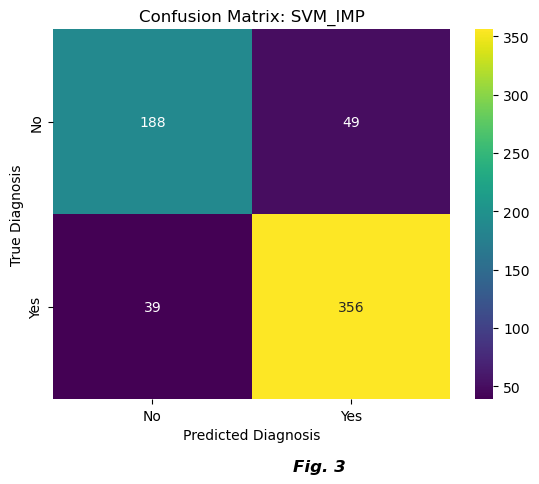

In [64]:
## Create a confusion Matrix 

# Confusion Matrix 

con_mat = confusion_matrix(y_true = y_test, 
                           y_pred = y_pred, labels = clf_svm3.classes_)
sns.heatmap(con_mat, annot=True,
           xticklabels = ["No", "Yes"],
           yticklabels = ["No", "Yes"], 
           fmt="d", 
           cmap="viridis")

# Set labels so they are not in exponential form 
plt.ylabel("True Diagnosis")
plt.xlabel("Predicted Diagnosis")
plt.figtext(x = 0.5, y = -0.04, s = "Fig. 3", fontstyle = "italic", fontweight = "demibold", fontsize = 12)
plt.title("Confusion Matrix: SVM_IMP")
plt.show()

In [66]:
# Calculate metrics

# F1 Score 

clf_svm3_f1 = f1_score(y_test, y_pred)

# Sensitivity
clf_svm3_sens = recall_score(y_test, y_pred)

# Precision
clf_svm3_prec = precision_score(y_test, y_pred)

# Specificity
clf_svm3_spec = con_mat[0,0]/(con_mat[0,0] + con_mat[0,1])

# Accuracy
clf_svm3_acc = accuracy_score(y_test, y_pred)

# Area under the ROC 
clf_svm3_auc = roc_auc_score(y_test, y_pred)

clf_svm3_metrics = pd.DataFrame({"Metric": ["F1_score","Sensitivty", "Specificity", "Precision", "Accuracy", "AUC"], 
                                "Values" : [clf_svm3_f1, clf_svm3_sens, clf_svm3_spec, clf_svm3_prec, clf_svm3_acc, clf_svm3_auc]})

In [68]:
clf_svm3_metrics

,Metric,Values
0,F1_score,0.890000
1,Sensitivty,0.901266
2,Specificity,0.793249
3,Precision,0.879012
4,Accuracy,0.860759
5,AUC,0.847257


In [85]:
pd.DataFrame({"Metric" : clf_svm_metrics.Metric,  
              "SVM_All" : clf_svm_metrics.Values, 
              "SVM_CV" : clf_svm_best_metrics.Values, 
              "SVM_IMP" : clf_svm3_metrics.Values})

,Metric,SVM_All,SVM_CV,SVM_IMP
0,F1_score,0.836186,0.845105,0.890000
1,Sensitivty,0.865823,0.863291,0.901266
2,Specificity,0.658228,0.658228,0.658228
3,Precision,0.808511,0.827670,0.879012
4,Accuracy,0.787975,0.802215,0.860759
5,AUC,0.762025,0.781857,0.847257


0    0.836186
1    0.865823
2    0.658228
3    0.808511
4    0.787975
5    0.762025
Name: Values, dtype: float64